# **ASSIGNMENT 4: Classification Empirical Study - Text Classification**

This was an assignment completed for the Introduction to AI course. This assingnment was completed in a group of two people.
Portions of this assignment were removed to make it public. This is not a working/full copy of the completed assignment.

# **1. Choose a Text Classification Dataset**

(reduced) CNN theme classification:
https://www.kaggle.com/datasets/pedroaribe/4000-cnn-articles-as-of-1062023

There are 4000 articles to be classified into various themes (e.g. politics, sport, weather, …)

# **2. Perform some tasks from the NLP pipeline on textual data**

###Derived Datasets

In [ ]:
#let's start by installing spaCy
!pip install spacy

In [ ]:
import spacy
import pandas as pd
import numpy as np

# Useful for calculating precision, recall, micros & macros
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report
)

# Just a tad QoL import to decrease verbosity from warnings
import warnings
warnings.filterwarnings('ignore')

Using a reduced version of the CNN dataset. This dataset, as opposed to the original dataset, has 1412 sample articles.


In [ ]:
# Load the dataset you chose.
# removed for public repo
#url = 'https://raw.githubusercontent.com/{reduced kaggle dataset for cnn news}'

In [ ]:
data = pd.read_csv(url)

In [ ]:
data.head()

,ID,Title,Description,Body,Keywords,Theme,Link
0,1,Candy factory didn't evacuate concerned worker...,An eastern Pennsylvania candy factory didn’t e...,An eastern Pennsylvania candy factory didn’t e...,"accident investigations, accidents, accidents,...",us,https://edition.cnn.com/2023/10/06/us/pennsylv...
1,2,Baltimore police ask for public's help identif...,Two shooters were involved in an attack at Mor...,Two shooters were involved in an attack at Mor...,"baltimore, brand safety-nsf crime, brand safet...",us,https://edition.cnn.com/2023/10/06/us/morgan-s...
2,3,An arrest warrant has been issued for a suspec...,Authorities in Pennsylvania say they have issu...,Authorities in Pennsylvania say they have issu...,"arrest warrants, arrests, brand safety-nsf cri...",us,https://edition.cnn.com/2023/10/06/us/josh-kru...
3,4,115 improperly stored human remains found in C...,An investigation into more than 115 bodies fou...,An investigation into more than 115 bodies fou...,"brand safety-nsf death, brand safety-nsf sensi...",us,https://edition.cnn.com/2023/10/06/us/colorado...
4,5,Bronx day care provider and 2 others indicted ...,"A Bronx day care provider, her husband and his...","A Bronx day care provider, her husband and his...","brand safety-nsf crime, brand safety-nsf death...",us,https://edition.cnn.com/2023/10/05/us/bronx-da...


This is where you create the NLP pipeline. load() will download the correct model (English).

In [ ]:
nlp = spacy.load("en_core_web_sm")

Applying the pipeline to every sentences creates a Document where every word is a Token object.

Doc: https://spacy.io/api/doc

Token: https://spacy.io/api/token

In [ ]:
#Apply nlp pipeline to the column that has your sentences.
data['tokenized'] = data['Title'].apply(nlp)

In [ ]:
data.head()

,ID,Title,Description,Body,Keywords,Theme,Link,tokenized
0,1,Candy factory didn't evacuate concerned worker...,An eastern Pennsylvania candy factory didn’t e...,An eastern Pennsylvania candy factory didn’t e...,"accident investigations, accidents, accidents,...",us,https://edition.cnn.com/2023/10/06/us/pennsylv...,"(Candy, factory, did, n't, evacuate, concerned..."
1,2,Baltimore police ask for public's help identif...,Two shooters were involved in an attack at Mor...,Two shooters were involved in an attack at Mor...,"baltimore, brand safety-nsf crime, brand safet...",us,https://edition.cnn.com/2023/10/06/us/morgan-s...,"(Baltimore, police, ask, for, public, 's, help..."
2,3,An arrest warrant has been issued for a suspec...,Authorities in Pennsylvania say they have issu...,Authorities in Pennsylvania say they have issu...,"arrest warrants, arrests, brand safety-nsf cri...",us,https://edition.cnn.com/2023/10/06/us/josh-kru...,"(An, arrest, warrant, has, been, issued, for, ..."
3,4,115 improperly stored human remains found in C...,An investigation into more than 115 bodies fou...,An investigation into more than 115 bodies fou...,"brand safety-nsf death, brand safety-nsf sensi...",us,https://edition.cnn.com/2023/10/06/us/colorado...,"(115, improperly, stored, human, remains, foun..."
4,5,Bronx day care provider and 2 others indicted ...,"A Bronx day care provider, her husband and his...","A Bronx day care provider, her husband and his...","brand safety-nsf crime, brand safety-nsf death...",us,https://edition.cnn.com/2023/10/05/us/bronx-da...,"(Bronx, day, care, provider, and, 2, others, i..."


A Token object has many attributes such as part-of-speech (pos_), lemma (lemma_), etc. Take a look at the documentation to see all attributes.

The following function is an example on how you can fetch a specific pos tagging from a sentence. We return the lemmatization because we only want the infinitive word.

In [ ]:
# Create empty dataframes that will store your derived datasets

# This is the derived dataset 1
derived_dataset1 = pd.DataFrame(columns = ['Theme', 'pos'])

# This dataset contains named entities: organizations, names, dates
derived_dataset2 = pd.DataFrame(columns = ['Theme', 'pos-np'])

In [ ]:
def get_pos(sentence, wanted_pos): #wanted_pos refers to the desired pos tagging
    verbs = []
    for token in sentence:
        if token.pos_ in wanted_pos:
            verbs.append(token.lemma_) # lemma returns a number. lemma_ return a string
    return ' '.join(verbs) # return value is as a string and not a list for countVectorizer

###**Derived Dataset 1**

POS (Part-of-Speech) tags included: nouns, verbs and adjectives. The reason for including the entirety of the suggested subset is because we had run some tests beforehand with one or two tags, but the model was performing poorly, less than 0.5 in accuracy.

In [ ]:
# we use the above function to fetch all the verbs. We store this information in our first derived dataset
derived_dataset1['pos'] = data['tokenized'].apply(lambda sent : get_pos(sent, ['NOUN', 'VERB']))

# The derived datasets should still have the same column Theme (the variable we are classifying for)
derived_dataset1['Theme'] = data['Theme']

derived_dataset1.head()

,Theme,pos
0,us,candy factory evacuate worker explosion kill o...
1,us,police ask public help identify shooter homeco...
2,us,arrest warrant issue suspect killing journalist
3,us,store remain find funeral home say
4,us,day care provider other indict murder charge y...


###**Derived Dataset 2**

POS (Part-of-Speech) tags included: propernouns, symbols, numbers and nouns. The reason being

**Choose a subset that
you think is appropriate for your task**

In [ ]:
# Since we are doing NER, we should include and tokenize proper nouns, symbols and numbers
derived_dataset2['pos-np'] = data['tokenized'].apply(lambda sent : get_pos(sent, ['PROPN', 'SYM', 'NUM', 'NOUN']))

# The derived datasets should still have the same column Theme (the variable we are classifying for)
derived_dataset2['Theme'] = data['Theme']

derived_dataset2.head()

,Theme,pos-np
0,us,candy factory worker Pennsylvania explosion 7 ...
1,us,Baltimore police public help 2 shooter Morgan ...
2,us,arrest warrant suspect killing Philadelphia jo...
3,us,115 remain Colorado funeral home sheriff
4,us,Bronx day care provider 2 other murder charge ...


In [ ]:
#For Derived Dataset 2, you also need to include Named Entities
#Below is just an example of obtaining such entities on a specific sentence, but you would do NER
#on the dataset of your choice.
#You can choose the types of entities (dates, organization, people) that you want,
#and then in your derived dataset, just make sure you include these entities separated by spaces (as shown for verbs)
#in a previous cell.

derived_dataset2_ = derived_dataset2.copy()
for i in range(len(derived_dataset2_['pos-np'])):
  doc = nlp(derived_dataset2_['pos-np'][i])

  tmp = ''
  for ent in doc.ents:
      tmp += '('+ent.text+' '+ent.label_+') '
  derived_dataset2_['pos-np'][i] = tmp

derived_dataset2_['pos-np'].head()

0                                  (Pennsylvania GPE) 
1    (Baltimore GPE) (2 CARDINAL) (Morgan State Uni...
2             (Philadelphia GPE) (Josh Kruger PERSON) 
3                       (115 CARDINAL) (Colorado GPE) 
4              (Bronx GPE) (2 CARDINAL) (1 year DATE) 
Name: pos-np, dtype: object

Now that we have our datasets processed, we can move on the classifying each one of them against all 4 models.

# **3. Perform a classification empirical study**

##**1.Encode the text as input features with associated values**

Luckily for us, vectorizing is already part of the feature_extraction package from sklearn. Using fit_transform, we are able to extract the feature vectors from the plaintext. Since we have 3 datasets to compare, we end up with 3 feature vectors of different sizes. As expected, the original dataset results in a larger feature vector since it has not been reduced by tokenization.

####a) Vectorize & Transform - Original Dataset

Building a dictionary of features based on all the text in the dataset. The result is a matrix where every cell represents the word and its related count in a particular corpus of text.


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
# original dataset data[]
dataset_counts = count_vect.fit_transform(data['Title'])
dataset_counts.shape

(1412, 5022)

**Use the tf-idf as the attribute value:**

From scikit, "longer documents will have higher average count values than shorter documents, even though they might talk about the same topics." This means that we must transform our feature vector to one that is unbiased in all regards, namely in frequency of the words. Term Frequency times Inverse Document Frequency (tf-idf) helps us do this plus "downscales weights for words that occur in many documents." With all this, we can then do classification.

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
# original dataset
dataset_tfidf = tfidf_transformer.fit_transform(dataset_counts)
dataset_tfidf.shape

(1412, 5022)

####b) Vectorize & Transform - Derived Dataset 1

Exactly how we vectorize & transform the original dataset, we do on this new derived dataset.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# First obtain the matrix
count_vect = CountVectorizer()
dataset1_counts = count_vect.fit_transform(derived_dataset1['pos'])

# Then eliminate as much bias as possible
tfidf_transformer = TfidfTransformer()
dataset1_tfidf = tfidf_transformer.fit_transform(dataset1_counts)
dataset1_tfidf.shape

(1412, 2303)

####c) Vectorize & Transform - Derived Dataset 2

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# First obtain the matrix
count_vect = CountVectorizer()
dataset2_counts = count_vect.fit_transform(derived_dataset2['pos-np'])

# Then eliminate as much bias as possible
tfidf_transformer = TfidfTransformer()
dataset2_tfidf = tfidf_transformer.fit_transform(dataset2_counts)
dataset2_tfidf.shape

(1412, 2938)

##**2. Define 2 models using some default parameters**

###a) Logistic Regression Model

Logistic regression is for prediction on binary classes. There is a type of logistic regression called multinomial logistic regression where the target variable has three or more nominal categories. The target variable is categorical where it uses a linear equation of the variables for prediction.

Linear regression uses the sigmoid function.

Reference: https://www.datacamp.com/tutorial/understanding-logistic-regression-python

In [ ]:
from sklearn.linear_model import LogisticRegression

# build the logistic regression model
model_lr = LogisticRegression(tol=1e-4, solver="lbfgs")

In [ ]:
from sklearn.model_selection import train_test_split

# https://www.datacamp.com/tutorial/understanding-logistic-regression-python
# function for logistic regression training and testing
# it splits the data into training and testing sets
def logistic_regression(model_lr, X_lr, y_lr):

  # split the dataset into training and testing sets
  X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr, y_lr, test_size=0.33, random_state=16)

  # train the model using the training set
  model_lr.fit(X_train_lr, y_train_lr)

  # use the model to make predictions on the testing set
  y_pred_lr = model_lr.predict(X_test_lr)

  return y_test_lr, y_pred_lr

###b) Multilayer Perceptron Model

Different from the logistic regression model, the multilayer perceptron model boasts of multiple hidden layers to properly fit the data using non-linear activation function against multiple classes. Below is a definition for a parameterized version of the MLP model. This allows us to do K-fold cross validation with minimal verbose and repetition.

In [ ]:
from sklearn.neural_network import MLPClassifier

# Definition of the MLP model given default params
# - ReLU: rectified linear unit: takes input x and outputs f(x) = max(0, x)
# - constant learning rate: helps model converge faster and avoid overfitting
model_mlp = MLPClassifier(random_state=1, activation='relu', learning_rate='constant')

In [ ]:
from sklearn.model_selection import train_test_split

# function for training and testing the MLP model
def MLP(model_mlp, X, y):

  # Split the data into training and testing data
  X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

  # Train the MLP model on the training data
  model_mlp.fit(X_train, y_train)

  # Get prediction for the test data
  y_pred = model_mlp.predict(X_test)

  return y_test, y_pred

##**3.Train/test/evaluate the 2 default models on all 3 datasets**

###**Function for 4-fold cross validation:**

In [ ]:
import numpy as np
from sklearn.model_selection import KFold

# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
# function for 4 fold validation for a given model
def k_fold(model_kf, X_d, y_d, verbose):

  # need to convert to np arrays to split the dataset for kfold

  # convert the features to a numpy array
  X_kf = X_d
  # convert the target class column to a numpy arrray
  y_kf = np.array(y_d)

  # the models predictions for the classes
  predicted_y = []

  # the expected target values for the classes
  expected_y = []

  # creates the indexes for 4 folds with shuffling
  kf = KFold(n_splits=4, shuffle=True)

  # go through each fold of training and testing sets
  # this will loop 4 times for 4 folds
  for i, (train_indexes, test_indexes) in enumerate(kf.split(X_kf)):
    if verbose:
      print(f"Fold {i+1}:")
      print(f"  Train: index={train_indexes}")
      print(f"  Test:  index={test_indexes}")

    # train the model on the current folds training set
    model_training_kf = model_kf.fit(X_kf[train_indexes], y_kf[train_indexes])

    # use the model to make predictions on the current folds testing set
    y_pred_kf = model_kf.predict(X_kf[test_indexes])

    # the expected results of the current fold testing set
    y_exp_kf = y_kf[test_indexes]

    # add the predictions to the list
    predicted_y.extend(y_pred_kf)

    # add the expected values of the folds testing set to the list
    expected_y.extend(y_exp_kf)

  return expected_y, predicted_y

###**Functions for evaluation:**

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn.inspection import DecisionBoundaryDisplay

In [ ]:
# function for creating confusion matrix
def create_confusion_matrix(y_test, y_pred):

  # build the confusion matrix using expected and predicted values
  cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

  # build the display for the confusion matrix
  disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix)

  # print the display matrix
  return disp.plot()

In [ ]:
# function for calculating the evaluation metrics
def calculate_evaluation(y_test, y_pred):
  # calculate the accuracy and f1 score of the prediction and target results
  accuracy = accuracy_score(y_pred, y_test)
  f1 = f1_score(y_pred, y_test, average="weighted")
  print("Accuracy:", accuracy)
  print("F1 Score:", f1)

  # calculate the classification report with the precision, recall, and averages
  print(classification_report(y_test, y_pred))
  # calculate and print the micro average
  f1_micro = f1_score(y_test, y_pred, average='micro')
  print("Micro-average F1 score: ", f1_micro)

###**Split the datasets into training and testing:**

In [ ]:
# original dataset
X_d = dataset_tfidf
y_d = data['Theme']

In [ ]:
# derived dataset 1
X_d1 = dataset1_tfidf
y_d1 = derived_dataset1['Theme']

In [ ]:
# derived dataset 2
X_d2 = dataset2_tfidf
y_d2 = derived_dataset2['Theme']

###**Logistic Regression Model**

####a) Original Dataset

In [ ]:
# train and test the model on the original dataset
test_lr_d, pred_lr_d = k_fold(model_lr, X_d, y_d, True)

Fold 1:
  Train: index=[   0    1    2 ... 1409 1410 1411]
  Test:  index=[  15   19   21   23   24   25   26   27   28   29   31   35   37   43
   45   57   58   59   62   67   76   78   79   81   86   89   90   92
   96   97   98  102  110  114  115  127  132  142  144  146  154  156
  157  175  177  179  187  189  191  197  203  206  207  209  210  211
  215  224  225  231  232  240  244  247  248  253  266  267  270  273
  281  288  292  298  299  303  304  311  312  316  318  327  333  363
  365  373  375  377  383  389  394  398  403  404  406  409  419  420
  423  426  432  434  436  450  461  462  464  473  475  487  496  497
  506  507  508  509  515  516  524  527  528  535  541  542  546  552
  553  555  556  557  562  564  568  572  576  578  582  592  597  602
  603  608  610  620  624  626  637  644  646  651  653  658  659  663
  664  679  680  681  687  692  696  698  699  701  702  708  727  730
  731  733  737  739  741  745  746  747  749  751  753  756  757  760
  7

Accuracy: 0.5771954674220963
F1 Score: 0.6001574269630544
               precision    recall  f1-score   support

     business       0.59      0.44      0.50       201
          cnn       0.00      0.00      0.00         1
entertainment       0.71      0.09      0.16       113
       health       0.83      0.57      0.68       139
     opinions       1.00      0.95      0.98       126
     politics       0.95      0.72      0.82       174
        sport       0.95      0.41      0.57       152
        style       0.00      0.00      0.00        15
       travel       0.00      0.00      0.00        11
           us       0.00      0.00      0.00        84
      weather       0.94      0.47      0.63        97
        world       0.36      0.95      0.52       299

     accuracy                           0.58      1412
    macro avg       0.53      0.38      0.40      1412
 weighted avg       0.67      0.58      0.55      1412

Micro-average F1 score:  0.5771954674220963


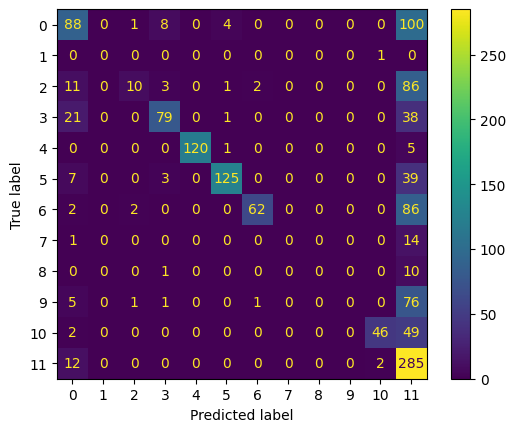

In [ ]:
# evaluate
calculate_evaluation(test_lr_d, pred_lr_d)
create_confusion_matrix(test_lr_d, pred_lr_d)

####b) Derived Dataset 1

In [ ]:
# train and test the model on the derived dataset 1
test_lr_d1, pred_lr_d1 = k_fold(model_lr, X_d1, y_d1, False)

Accuracy: 0.5396600566572238
F1 Score: 0.5564936526027303
               precision    recall  f1-score   support

     business       0.60      0.53      0.56       201
          cnn       0.00      0.00      0.00         1
entertainment       0.81      0.15      0.25       113
       health       0.92      0.47      0.63       139
     opinions       1.00      0.97      0.98       126
     politics       0.84      0.47      0.60       174
        sport       0.71      0.39      0.51       152
        style       0.00      0.00      0.00        15
       travel       0.00      0.00      0.00        11
           us       0.50      0.01      0.02        84
      weather       0.89      0.42      0.57        97
        world       0.34      0.89      0.49       299

     accuracy                           0.54      1412
    macro avg       0.55      0.36      0.38      1412
 weighted avg       0.67      0.54      0.52      1412

Micro-average F1 score:  0.5396600566572238


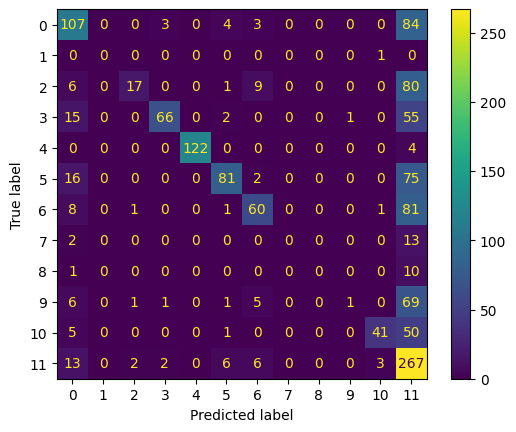

In [ ]:
# evaluate
calculate_evaluation(test_lr_d1, pred_lr_d1)
create_confusion_matrix(test_lr_d1, pred_lr_d1)

####c) Derived Dataset 2

In [ ]:
# train and test the model on the derived dataset 2
test_lr_d2, pred_lr_d2 = k_fold(model_lr, X_d2, y_d2, False)

Accuracy: 0.6402266288951841
F1 Score: 0.6570968392062285
               precision    recall  f1-score   support

     business       0.75      0.64      0.69       201
          cnn       0.00      0.00      0.00         1
entertainment       0.77      0.15      0.25       113
       health       0.93      0.59      0.72       139
     opinions       1.00      0.97      0.98       126
     politics       0.96      0.76      0.85       174
        sport       0.94      0.52      0.67       152
        style       0.00      0.00      0.00        15
       travel       0.00      0.00      0.00        11
           us       0.50      0.01      0.02        84
      weather       0.95      0.59      0.73        97
        world       0.39      0.95      0.56       299

     accuracy                           0.64      1412
    macro avg       0.60      0.43      0.46      1412
 weighted avg       0.75      0.64      0.62      1412

Micro-average F1 score:  0.6402266288951841


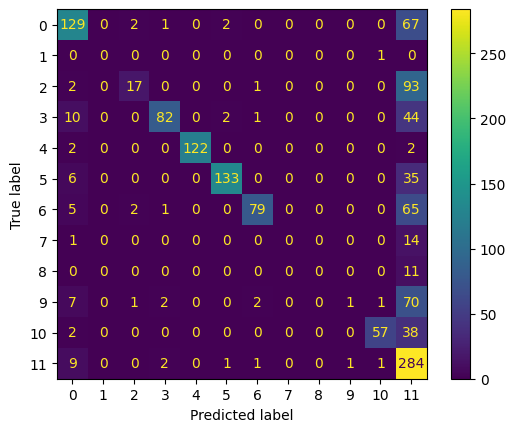

In [ ]:
# evaluate
calculate_evaluation(test_lr_d2, pred_lr_d2)
create_confusion_matrix(test_lr_d2, pred_lr_d2)

###Multilayer Perceptron Model (with default parameters)



####a) Original Dataset

In [ ]:
# train and test the mlp model on the original dataset
test_mlp_d, pred_mlp_d = k_fold(model_mlp, X_d, y_d, True)

Fold 1:
  Train: index=[   0    1    2 ... 1409 1410 1411]
  Test:  index=[   6   12   14   19   34   38   41   50   51   53   55   57   58   64
   67   79   84   93   94   96   97   99  102  114  117  128  132  135
  136  144  145  152  162  166  170  182  188  192  201  206  209  212
  215  216  218  219  221  222  227  230  237  239  240  246  248  249
  250  251  254  259  260  268  269  277  280  281  287  288  290  292
  297  298  306  308  311  314  320  337  345  349  351  356  361  363
  364  366  368  371  373  378  386  392  396  399  406  407  411  413
  414  422  428  435  442  443  456  462  473  476  482  487  496  498
  499  500  506  518  527  529  533  535  540  543  544  545  547  549
  552  565  574  578  582  583  585  587  589  593  596  603  606  613
  615  616  618  619  622  629  633  634  637  644  648  651  656  657
  670  678  688  689  691  693  696  697  700  706  707  712  716  719
  721  723  724  726  733  736  738  741  742  745  752  753  757  758
  7

Accuracy: 0.68342776203966
F1 Score: 0.6913879722813723
               precision    recall  f1-score   support

     business       0.59      0.70      0.64       201
          cnn       0.00      0.00      0.00         1
entertainment       0.66      0.42      0.51       113
       health       0.72      0.77      0.75       139
     opinions       0.85      0.62      0.72       126
     politics       0.77      0.82      0.80       174
        sport       0.82      0.68      0.74       152
        style       0.00      0.00      0.00        15
       travel       1.00      0.36      0.53        11
           us       0.52      0.33      0.41        84
      weather       0.86      0.81      0.84        97
        world       0.59      0.79      0.67       299

     accuracy                           0.68      1412
    macro avg       0.62      0.53      0.55      1412
 weighted avg       0.69      0.68      0.68      1412

Micro-average F1 score:  0.68342776203966


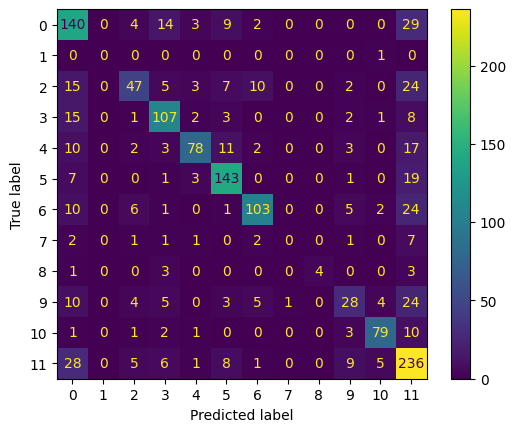

In [ ]:
# evaluate
calculate_evaluation(test_mlp_d, pred_mlp_d)
create_confusion_matrix(test_mlp_d, pred_mlp_d)

####b) Derived Dataset 1

In [ ]:
# train and test the mlp model on the derived dataset 1
test_mlp_d1, pred_mlp_d1 = k_fold(model_mlp, X_d1, y_d1, False)

Accuracy: 0.5729461756373938
F1 Score: 0.5796314625913028
               precision    recall  f1-score   support

     business       0.48      0.61      0.53       201
          cnn       0.00      0.00      0.00         1
entertainment       0.49      0.35      0.40       113
       health       0.72      0.60      0.65       139
     opinions       0.92      0.87      0.89       126
     politics       0.60      0.57      0.59       174
        sport       0.57      0.56      0.57       152
        style       0.00      0.00      0.00        15
       travel       0.75      0.27      0.40        11
           us       0.37      0.24      0.29        84
      weather       0.55      0.73      0.63        97
        world       0.52      0.59      0.55       299

     accuracy                           0.57      1412
    macro avg       0.50      0.45      0.46      1412
 weighted avg       0.57      0.57      0.57      1412

Micro-average F1 score:  0.5729461756373938


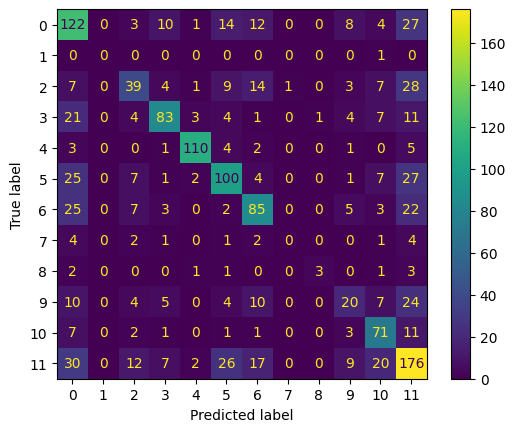

In [ ]:
# evaluate
calculate_evaluation(test_mlp_d1, pred_mlp_d1)
create_confusion_matrix(test_mlp_d1, pred_mlp_d1)

####c) Derived Dataset 2

In [ ]:
# train and test the mlp model on the derived dataset 2
test_mlp_d2, pred_mlp_d2 = k_fold(model_mlp, X_d2, y_d2, False)

Accuracy: 0.6968838526912181
F1 Score: 0.704061343416661
               precision    recall  f1-score   support

     business       0.71      0.71      0.71       201
          cnn       0.00      0.00      0.00         1
entertainment       0.66      0.35      0.46       113
       health       0.48      0.82      0.60       139
     opinions       0.87      0.77      0.82       126
     politics       0.84      0.82      0.83       174
        sport       0.82      0.74      0.78       152
        style       0.00      0.00      0.00        15
       travel       0.83      0.45      0.59        11
           us       0.49      0.31      0.38        84
      weather       0.85      0.77      0.81        97
        world       0.66      0.77      0.71       299

     accuracy                           0.70      1412
    macro avg       0.60      0.54      0.56      1412
 weighted avg       0.70      0.70      0.69      1412

Micro-average F1 score:  0.6968838526912181


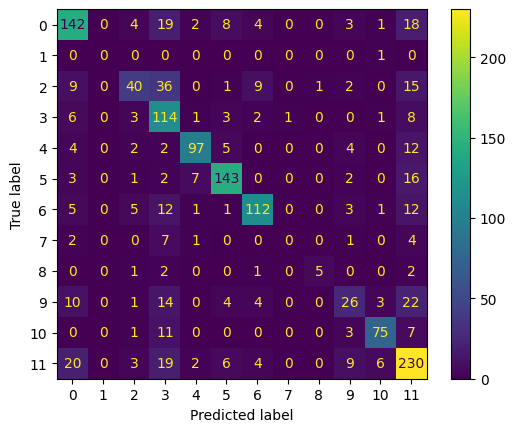

In [ ]:
# evaluate
calculate_evaluation(test_mlp_d2, pred_mlp_d2)
create_confusion_matrix(test_mlp_d2, pred_mlp_d2)

##**4. Modify some parameters of the MLP model and perform a train/test/evaluate again (two times)**

###MLP Model #2 - Using the 'logistic' Activation Function



In [ ]:
# Define the 2nd MLP model using the logistic activation function
model_mlp_log = MLPClassifier(random_state=1, activation='logistic', learning_rate='constant')

####a) Original Dataset

In [ ]:
# train and test the mlp model on the original dataset
test_mlp_log_d, pred_mlp_log_d = k_fold(model_mlp_log, X_d, y_d, True)

Fold 1:
  Train: index=[   0    1    3 ... 1408 1410 1411]
  Test:  index=[   2    8   17   24   25   29   30   31   38   43   48   51   58   59
   66   72   74   75   81   83  107  113  115  117  125  127  129  130
  133  134  144  152  154  155  157  166  168  187  188  192  197  203
  210  211  215  224  225  227  233  244  256  257  259  262  263  269
  271  273  274  278  280  281  282  283  284  288  290  308  309  315
  318  323  327  328  332  336  340  341  352  356  362  368  383  385
  393  394  396  404  407  408  414  416  421  422  424  427  429  432
  434  437  441  446  450  451  453  459  471  478  479  484  485  490
  497  499  504  508  509  512  524  527  528  536  540  542  550  565
  567  581  584  585  589  591  594  595  600  602  609  610  611  612
  613  622  632  635  639  645  648  653  655  665  668  670  673  677
  679  682  683  685  686  695  696  697  698  699  705  707  709  710
  714  715  716  723  726  729  731  733  736  739  747  751  755  760
  7

####b) Derived Dataset 1

In [ ]:
# train and test the mlp model on the derived dataset 1
test_mlp_log_d1, pred_mlp_log_d1 = k_fold(model_mlp_log, X_d1, y_d1, False)

####c) Derived Dataset 2

In [ ]:
# train and test the mlp model on the derived dataset 2
# reduced verbose from kfold, showing only results
test_mlp_log_d2, pred_mlp_log_d2 = k_fold(model_mlp_log, X_d2, y_d2, False)

**Perform an evaluation with precision/recall measures. Since you are looking at a
multi-class problem, make sure that you compare micro and macro averages on
precision and recall. Discuss the differences (if any) obtained. For your particular
dataset, are the classes balanced? That would impact the micro/macro results.**

###MLP Model #3 - Using an 'adaptive' Learning Rate

In [ ]:
# Define the 3rd MLP model using an adaptive learning rate
# a learning rate that changes according to error feedback
model_mlp_adapt = MLPClassifier(random_state=1, activation='relu', learning_rate='adaptive')

####a) Original Dataset

####b) Derived Dataset 1

In [ ]:
# train and test the mlp model on the derived dataset 1
test_mlp_adapt_d1, pred_mlp_adapt_d1 = k_fold(model_mlp_adapt, X_d1, y_d1, False)

####c) Derived Dataset 2

In [ ]:
# train and test the mlp model on the derived dataset 2
test_mlp_adapt_d2, pred_mlp_adapt_d2 = k_fold(model_mlp_adapt, X_d2, y_d2, False)

**Perform an evaluation with precision/recall measures. Since you are looking at a
multi-class problem, make sure that you compare micro and macro averages on
precision and recall. Discuss the differences (if any) obtained. For your particular
dataset, are the classes balanced? That would impact the micro/macro results.**

##**5. Analyze the obtained results**

### **3 Variations of MLP:**

# **References**



*   https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html
*   https://spacy.io/usage/linguistic-features
*   https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
*   https://www.kaggle.com/code/heeraldedhia/text-classification-nlp
*   https://saturncloud.io/blog/how-to-disable-warnings-in-jupyter-notebook/
*   https://github.com/Jcharis/Natural-Language-Processing-Tutorials/blob/master/Text%20Classification%20With%20Machine%20Learning,SpaCy,Sklearn(Sentiment%20Analysis)/Text%20Classification%20&%20Sentiment%20Analysis%20with%20SpaCy,Sklearn.ipynb

Logistic regression references:
* https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html#logistic-regression-3-class-classifier

* https://www.datacamp.com/tutorial/understanding-logistic-regression-python

* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression


*   Fall2023-CSI4106-NN

Code from Assignment 2: evaluation functions, kfold, logistic regression